Inventory management is the most crucial task when it comes to the operation of any business. In simple business terms, inventory management means controlling purchases made from suppliers by overseeing the incoming purchases made by the customers. Small and medium scaled businesses often have limited storage spaces and overstocking of any item can amount to loss in business. Therefore, keeping track of a forthcoming trend in sales is an absolute necessity at an operational level for a business. In this notebook, I will be working on a dataset of a superstore based in the US and perform some exploratory data analysis. Further, I will be performing time series analysis on the data to explore seasonal and overall trend and design a predictive model for forcasting sales with Prophet and ARIMA algorithm.

# Importing Libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import statsmodels.api as sm
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter('ignore', ConvergenceWarning)
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')
import itertools
from functools import reduce

# Uploading the data

In [2]:
df = pd.read_excel("/Users/pallavilohar/Downloads/Sample - Superstore.xls")
df.head(10)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
5,6,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
6,7,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,OFF-AR-10002833,Office Supplies,Art,Newell 322,7.2800,4,0.00,1.9656
7,8,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,TEC-PH-10002275,Technology,Phones,Mitel 5320 IP Phone VoIP phone,907.1520,6,0.20,90.7152
8,9,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,OFF-BI-10003910,Office Supplies,Binders,DXL Angle-View Binders with Locking Rings by S...,18.5040,3,0.20,5.7825
9,10,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,OFF-AP-10002892,Office Supplies,Appliances,Belkin F5C206VTEL 6 Outlet Surge,114.9000,5,0.00,34.4700


# Data Preprocessing

## Checking null values 

In [3]:
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

As we can see, there are no null values in the columns so we are good.

# EDA

There are three categories in the Superstore dataset (Furniture, Office Supplies and Technology). In this section, we will just focus on top three sub-categories for each of the three categories. 

## Top 3 popular sub-categories in Furniture

In [4]:
furniture = df[df['Category']=='Furniture']

In [5]:
top3_furniture = furniture['Sub-Category'].value_counts().nlargest(3)

In [6]:
top3_furniture

Furnishings    957
Chairs         617
Tables         319
Name: Sub-Category, dtype: int64

## Top 3 popular sub-categories in Office Supplies

In [7]:
off_supplies = df[df['Category']=='Office Supplies']

In [8]:
top3_off_supplies = off_supplies['Sub-Category'].value_counts().nlargest(3)

In [9]:
top3_off_supplies

Binders    1523
Paper      1370
Storage     846
Name: Sub-Category, dtype: int64

## Top 3 popular sub-categories in Technology

In [10]:
technology = df[df['Category']=='Technology']

In [11]:
top3_technology = technology['Sub-Category'].value_counts().nlargest(3)

In [12]:
top3_technology

Phones         889
Accessories    775
Machines       115
Name: Sub-Category, dtype: int64

In [13]:
furnishings = furniture[furniture['Sub-Category'] == top3_furniture.index[0]]
chairs = furniture[furniture['Sub-Category'] == top3_furniture.index[1]]
tables = furniture[furniture['Sub-Category'] == top3_furniture.index[2]]

binders = off_supplies[off_supplies['Sub-Category'] == top3_off_supplies.index[0]]
paper = off_supplies[off_supplies['Sub-Category'] == top3_off_supplies.index[1]]
storage = off_supplies[off_supplies['Sub-Category'] == top3_off_supplies.index[2]]

phones = technology[technology['Sub-Category'] == top3_technology.index[0]]
accessories = technology[technology['Sub-Category'] == top3_technology.index[1]]
machines = technology[technology['Sub-Category'] == top3_technology.index[2]]

# Indexing Time Series Data

In [14]:
furnishings = furnishings.groupby('Order Date')['Quantity'].sum().reset_index().set_index('Order Date')
chairs = chairs.groupby('Order Date')['Quantity'].sum().reset_index().set_index('Order Date')
tables = tables.groupby('Order Date')['Quantity'].sum().reset_index().set_index('Order Date')

In [15]:
binders = binders.groupby('Order Date')['Quantity'].sum().reset_index().set_index('Order Date')
paper = paper.groupby('Order Date')['Quantity'].sum().reset_index().set_index('Order Date')
storage = storage.groupby('Order Date')['Quantity'].sum().reset_index().set_index('Order Date')

In [16]:
phones = phones.groupby('Order Date')['Quantity'].sum().reset_index().set_index('Order Date')
accessories = accessories.groupby('Order Date')['Quantity'].sum().reset_index().set_index('Order Date')
machines = machines.groupby('Order Date')['Quantity'].sum().reset_index().set_index('Order Date')

In [17]:
t_furnishings = furnishings['Quantity'].resample('MS').sum()
t_chairs = chairs['Quantity'].resample('MS').sum()
t_tables = tables['Quantity'].resample('MS').sum()

In [18]:
t_binders = binders['Quantity'].resample('MS').sum()
t_paper = paper['Quantity'].resample('MS').sum()
t_storage = storage['Quantity'].resample('MS').sum()

In [19]:
t_phones = phones['Quantity'].resample('MS').sum()
t_accessories = accessories['Quantity'].resample('MS').sum()
t_machines = machines['Quantity'].resample('MS').sum()

# Visualizing Time Series Data

## Creating dataframes of sub-categories  

In [20]:
furnishings = pd.DataFrame({'Order Date':t_furnishings.index, 'furnishings-quantity':t_furnishings.values})
chairs = pd.DataFrame({'Order Date':t_chairs.index, 'chairs-quantity':t_chairs.values})
tables = pd.DataFrame({'Order Date':t_tables.index, 'tables-quantity':t_tables.values})

In [21]:
binders = pd.DataFrame({'Order Date':t_binders.index, 'binders-quantity':t_binders.values})
paper = pd.DataFrame({'Order Date':t_paper.index, 'paper-quantity':t_paper.values})
storage = pd.DataFrame({'Order Date':t_storage.index, 'storage-quantity':t_storage.values})

In [22]:
phones = pd.DataFrame({'Order Date':t_phones.index, 'phones-quantity':t_phones.values})
accessories = pd.DataFrame({'Order Date':t_accessories.index, 'accessories-quantity':t_accessories.values})
machines = pd.DataFrame({'Order Date':t_machines.index, 'machines-quantity':t_machines.values})

In [23]:
dataframes = [furnishings, chairs, tables, binders, paper, storage, phones, accessories, machines]

In [24]:
store = reduce(lambda  left,right: pd.merge(left,right,on=['Order Date'],
                                            how='inner'), dataframes)

In [25]:
store.head()

,Order Date,furnishings-quantity,chairs-quantity,tables-quantity,binders-quantity,paper-quantity,storage-quantity,phones-quantity,accessories-quantity,machines-quantity
0,2014-03-01,32,54,28,87,92,52,37,31,16
1,2014-04-01,36,19,23,79,63,65,64,42,4
2,2014-05-01,37,33,18,92,50,19,54,24,0
3,2014-06-01,39,38,36,75,53,34,50,19,8
4,2014-07-01,55,36,14,104,65,59,44,58,0


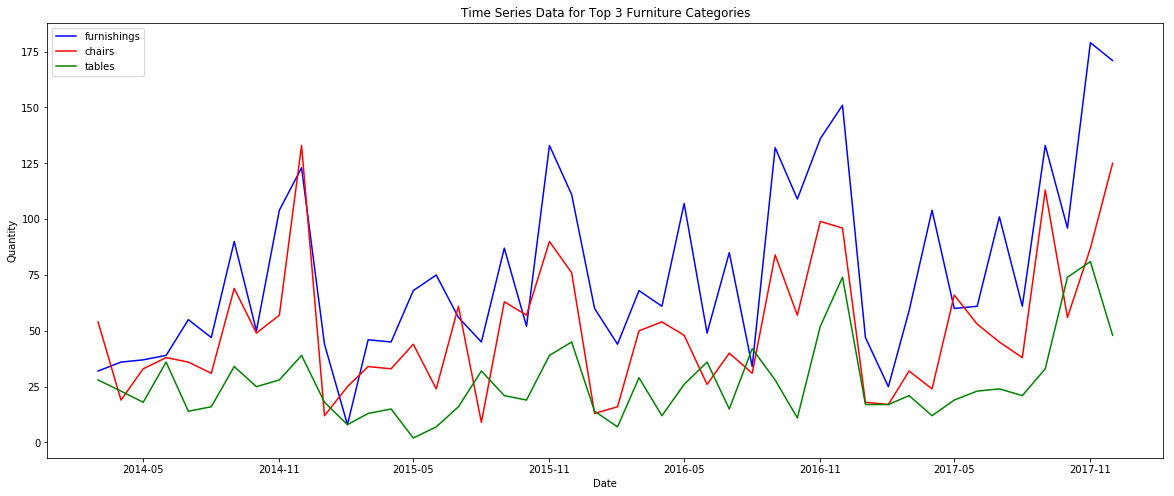

In [26]:
plt.figure(figsize=(20, 8))
plt.plot(store['Order Date'], store['furnishings-quantity'], 'b-', label = 'furnishings')
plt.plot(store['Order Date'], store['chairs-quantity'], 'r-', label = 'chairs')
plt.plot(store['Order Date'], store['tables-quantity'], 'g-', label = 'tables')
plt.xlabel('Date'); 
plt.ylabel('Quantity'); 
plt.title('Time Series Data for Top 3 Furniture Categories')
plt.legend();

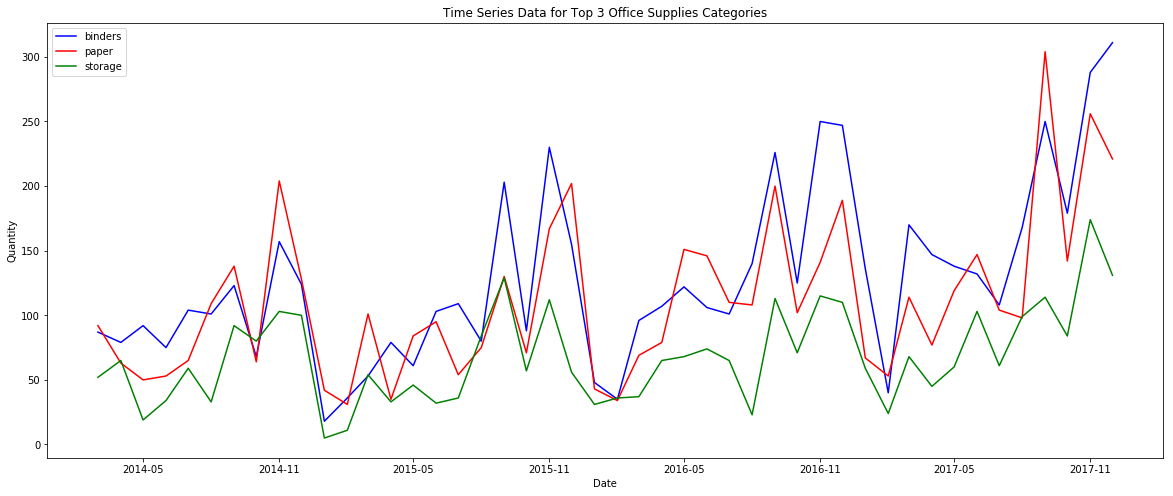

In [27]:
plt.figure(figsize=(20, 8))
plt.plot(store['Order Date'], store['binders-quantity'], 'b-', label = 'binders')
plt.plot(store['Order Date'], store['paper-quantity'], 'r-', label = 'paper')
plt.plot(store['Order Date'], store['storage-quantity'], 'g-', label = 'storage')
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.title('Time Series Data for Top 3 Office Supplies Categories')
plt.legend()

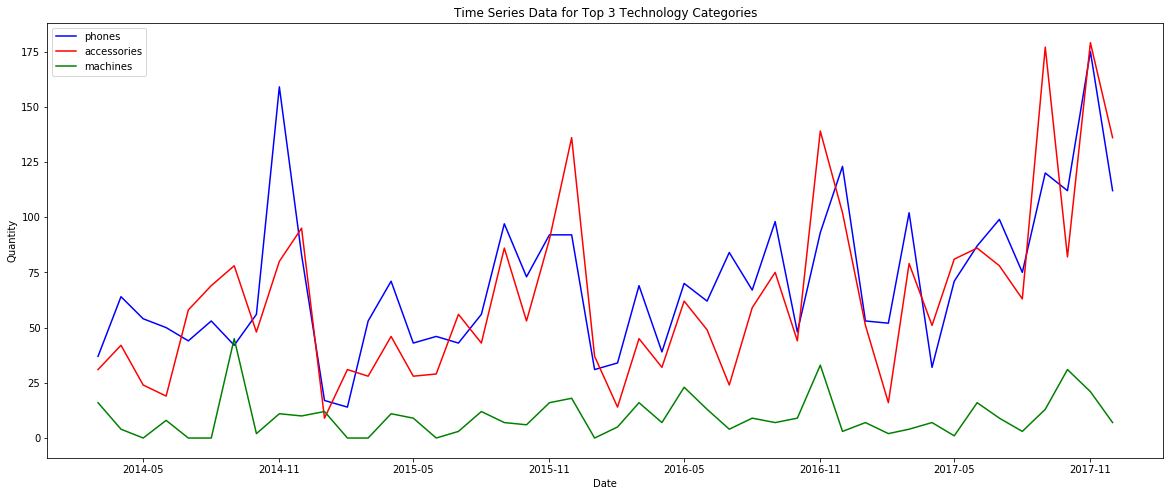

In [28]:
plt.figure(figsize=(20, 8))
plt.plot(store['Order Date'], store['phones-quantity'], 'b-', label = 'phones')
plt.plot(store['Order Date'], store['accessories-quantity'], 'r-', label = 'accessories')
plt.plot(store['Order Date'], store['machines-quantity'], 'g-', label = 'machines')
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.title('Time Series Data for Top 3 Technology Categories')
plt.legend()

Above, we have plotted 3 seperate plots for top 3 item categories in furnitures, office supplies and technologies respectively. The quantities of each of the items is given on the y-axis and the dates are mentioned on the x-axis. For most of the items we can trace an obvious seasonality, where the sale is low in the beginning of the year and the sale gradually increases towards the end of the year.    

# Time Series Modeling with Prophet

In [29]:
from fbprophet import Prophet


furnishings = furnishings.rename(columns={'Order Date': 'ds', 'furnishings-quantity': 'y'})
furnishings_model = Prophet(interval_width=0.95)
furnishings_model.fit(furnishings)

binders = binders.rename(columns={'Order Date': 'ds', 'binders-quantity': 'y'})
binders_model = Prophet(interval_width=0.95)
binders_model.fit(binders)


phones = phones.rename(columns={'Order Date': 'ds', 'phones-quantity': 'y'})
phones_model = Prophet(interval_width=0.95)
phones_model.fit(phones)

INFO:numexpr.utils:NumExpr defaulting to 8 threads.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [30]:
furnishings_forecast = furnishings_model.make_future_dataframe(periods=36, freq='MS')
furnishings_forecast = furnishings_model.predict(furnishings_forecast)

binders_forecast = binders_model.make_future_dataframe(periods=36, freq='MS')
binders_forecast = binders_model.predict(binders_forecast)

phones_forecast = phones_model.make_future_dataframe(periods=36, freq='MS')
phones_forecast = phones_model.predict(phones_forecast)

<Figure size 1296x432 with 0 Axes>

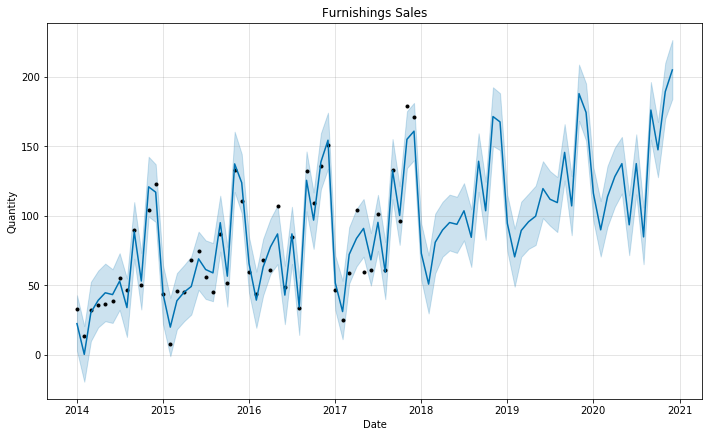

In [31]:
plt.figure(figsize=(18, 6))
furnishings_model.plot(furnishings_forecast, xlabel = 'Date', ylabel = 'Quantity')
plt.title('Furnishings Sales');

<Figure size 1296x432 with 0 Axes>

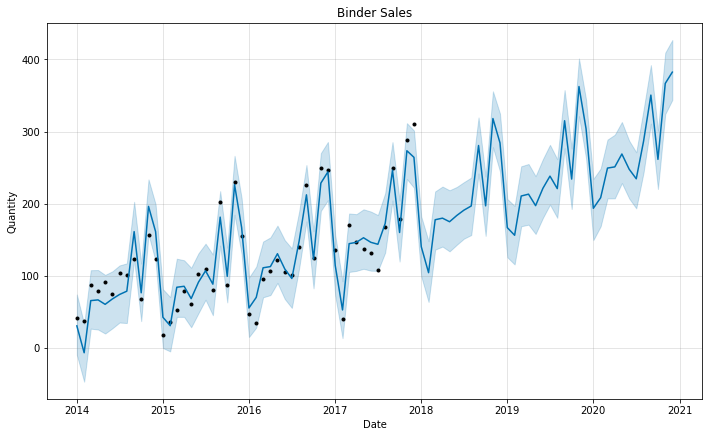

In [32]:
plt.figure(figsize=(18, 6))
binders_model.plot(binders_forecast, xlabel = 'Date', ylabel = 'Quantity')
plt.title('Binder Sales');

<Figure size 1296x432 with 0 Axes>

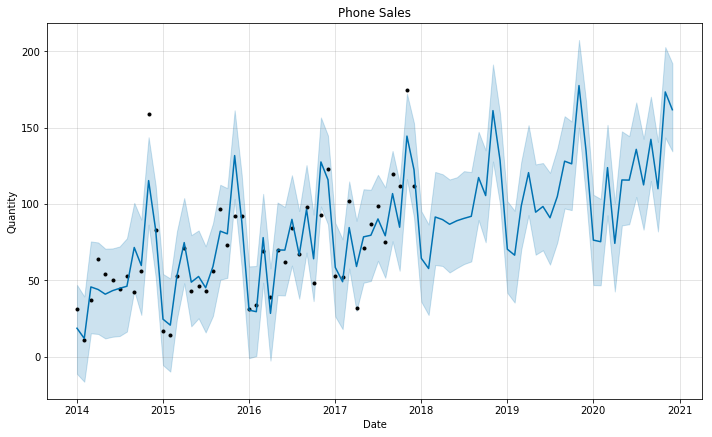

In [33]:
plt.figure(figsize=(18, 6))
phones_model.plot(phones_forecast, xlabel = 'Date', ylabel = 'Quantity')
plt.title('Phone Sales');

We can see that the model has nicely caputured the seasonality for the above categories. Their is high uncertainty in phone sales as compared to the other two categories (furnishing and binder).

## Comparing Forecast

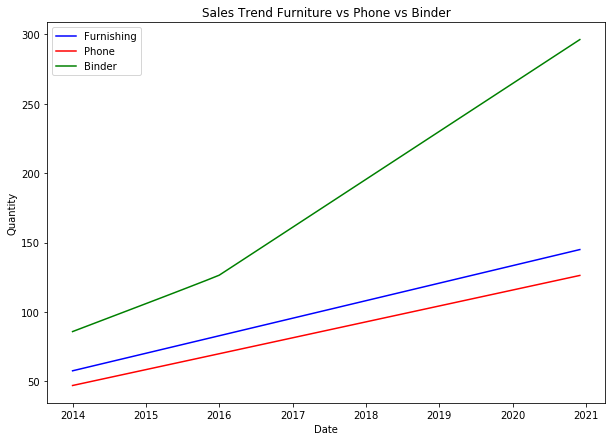

In [34]:
plt.figure(figsize=(10, 7))
plt.plot(furnishings_forecast['ds'], furnishings_forecast['trend'], 'b-', label='Furnishing')
plt.plot(phones_forecast['ds'], phones_forecast['trend'], 'r-', label='Phone')
plt.plot(binders_forecast['ds'], binders_forecast['trend'], 'g-', label='Binder')
plt.legend(); plt.xlabel('Date'); plt.ylabel('Quantity')
plt.title('Sales Trend Furniture vs Phone vs Binder');

We can surely observe that there is an upward trend for all the 3 categories and sale for binders is much higher than the other two categories. 

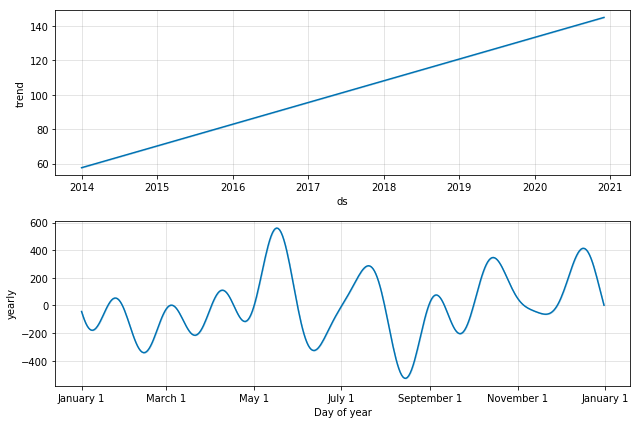

In [35]:
furnishings_model.plot_components(furnishings_forecast);

The furnishing sale is high during May end and low during August.

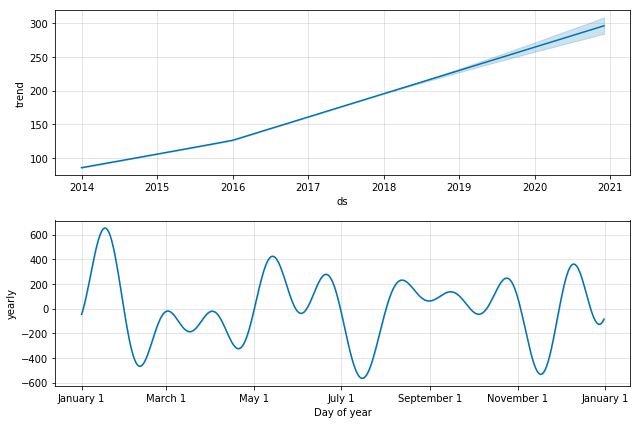

In [36]:
binders_model.plot_components(binders_forecast);

The binder sale is high in February and low in the months of July and November.

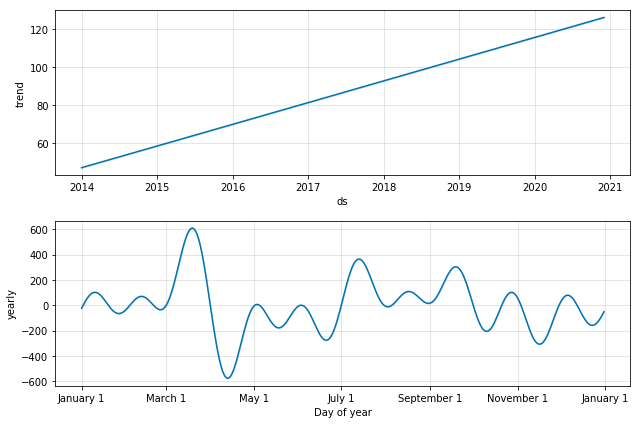

In [37]:
phones_model.plot_components(phones_forecast);

The phone sales are high in the month of March and low in the month of April.

# Time series forecasting with ARIMA (Office Supplies)

In [38]:
office_supplies = df.loc[df['Category'] == 'Office Supplies']

In [39]:
office_supplies = office_supplies.groupby('Order Date')['Quantity'].sum().reset_index()

In [40]:
office_supplies = office_supplies.set_index('Order Date')

In [41]:
t_office_supplies = office_supplies['Quantity'].resample('MS').sum()

## Using GRID SEARCH for searching the hyperparamters for ARIMA

In [42]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [43]:
for i in pdq:
    for j in seasonal_pdq:
        try:
            model = sm.tsa.statespace.SARIMAX(t_office_supplies,
                                            order=i,
                                            seasonal_order=j,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = model.fit()

            print('PDQ : {} SEASONAL PDQ : {} - AIC : {}'.format(i, j, results.aic))
        except:
            continue

PDQ : (0, 0, 0) SEASONAL PDQ : (0, 0, 0, 12) - AIC : 726.9463348755392
PDQ : (0, 0, 0) SEASONAL PDQ : (0, 0, 1, 12) - AIC : 1286.4518541465702
PDQ : (0, 0, 0) SEASONAL PDQ : (0, 1, 0, 12) - AIC : 441.2034952805388
PDQ : (0, 0, 0) SEASONAL PDQ : (1, 0, 0, 12) - AIC : 429.0350362461747
PDQ : (0, 0, 0) SEASONAL PDQ : (1, 0, 1, 12) - AIC : 1377.7993919394992
PDQ : (0, 0, 0) SEASONAL PDQ : (1, 1, 0, 12) - AIC : 306.7928588237577
PDQ : (0, 0, 1) SEASONAL PDQ : (0, 0, 0, 12) - AIC : 680.5072178298808
PDQ : (0, 0, 1) SEASONAL PDQ : (0, 0, 1, 12) - AIC : 2760.4660348441794
PDQ : (0, 0, 1) SEASONAL PDQ : (0, 1, 0, 12) - AIC : 416.0075705134336
PDQ : (0, 0, 1) SEASONAL PDQ : (1, 0, 0, 12) - AIC : 428.62530852960793
PDQ : (0, 0, 1) SEASONAL PDQ : (1, 0, 1, 12) - AIC : nan
PDQ : (0, 0, 1) SEASONAL PDQ : (1, 1, 0, 12) - AIC : 302.527139212913
PDQ : (0, 1, 0) SEASONAL PDQ : (0, 0, 0, 12) - AIC : 638.0878411705522
PDQ : (0, 1, 0) SEASONAL PDQ : (0, 0, 1, 12) - AIC : 1282.0014489535156
PDQ : (0, 1, 0) 

#### We are selecting p = d = q = 1 and P = D = 1 and Q = 0  and S = 12 because it has the lowest AIC value of 267.18

## Fitting the ARIMA Model

In [44]:

model = sm.tsa.statespace.SARIMAX(t_office_supplies,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = model.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0064      0.368     -0.017      0.986      -0.727       0.714
ma.L1         -0.6555      0.380     -1.724      0.085      -1.401       0.090
ar.S.L12      -0.4413      0.327     -1.348      0.178      -1.083       0.200
sigma2      7600.0405   4800.861      1.583      0.113   -1809.475     1.7e+04


## Validating Forecasts

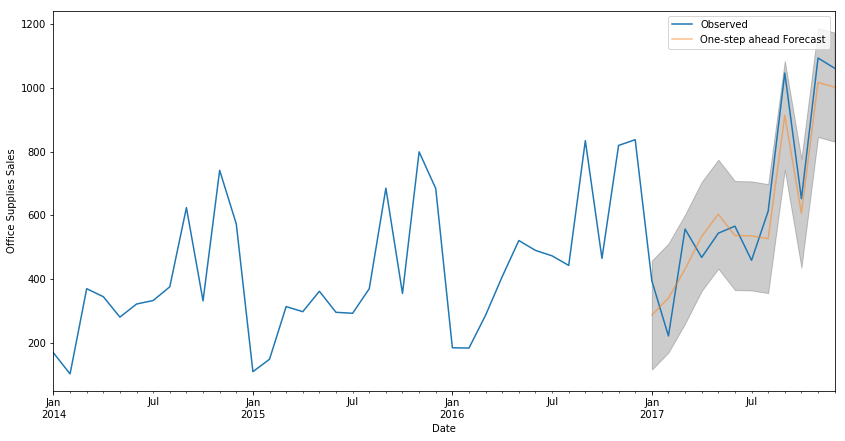

In [45]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

pred = results.get_prediction(start=pd.to_datetime('2017-01-01'), dynamic=False)
pred_ci = pred.conf_int()

ax = t_office_supplies.plot(label='Observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.5, figsize=(14, 7))

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('Office Supplies Sales')
plt.legend()

plt.show()

#### Overall, the above line plot shows that the forecasted values match very well to the observed value. The model shows an upward trend from the beginning of the year and it has very well captured the seasonality towards the end of the year.

## Producing and visualizing forecasts

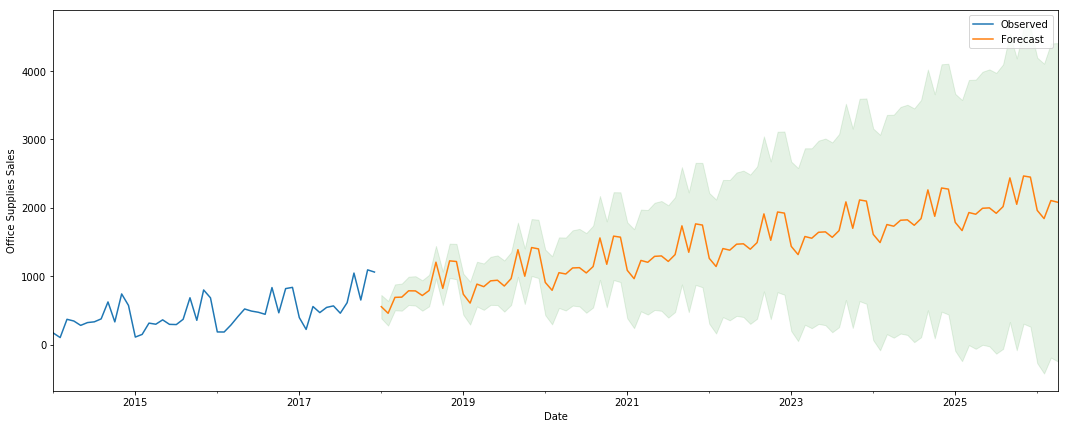

In [46]:
pred_uc = results.get_forecast(steps=100)
pred_ci = pred_uc.conf_int()
ax = t_office_supplies.plot(label='Observed', figsize=(18, 7), alpha=1)
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='g', alpha=.10)
ax.set_xlabel('Date')
ax.set_ylabel('Office Supplies Sales')
plt.legend()
plt.show()

####  The forecast above shows that the model has clearly adapted to the upward trend and the seasonal pattern which repeats every 12 months. We can also see that the uncertainty is low in 2018 but it keeps on increasing as we move further in time. This is because time series forecast depends on external factors and as we move ahead in time these external factors become more uncertain.